In [30]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
import pandas as pd
from scipy.optimize import curve_fit, minimize_scalar # for fitting the density with a function
import matplotlib.pylab as pl

import parameters


folder = "./input/"
#folder = "./No_DTcmb/"
#folder= "./data/"

# Inner Core size in exoplanets



## Structure of the exoplanets

Here is a figure of the internal structure of exoplanets computed here. 

In [31]:
## Exoplanets properties as in the _IS.res file

filename = folder+"data_IS.res"
names = ["M", "C_Fe", "C_FeM", "Psurf", "Rp", "Rc", \
           "RRc", "gs", "rho_c", "rho_m", "Cp_c",\
          "Cp_m", "alpha_c", "alpha_m", "k_m", \
           "shear_m", "Gruneisen", "Ts",  "Tc_adiab", \
         "pc", "DTc", "Tc0", "pc0", "gr_c",
         "r_ICB", "p_ICB", "iter_outer", "iter_inner"] 

data = pd.read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names, index_col=False)
print("Masses: ", data.M.unique())
print("C_Fe: ", data.C_Fe.unique())
print("C_FeM: ", data.C_FeM.unique())

Masses:  [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.8 2. ]
C_Fe:  [15. 25. 35. 45. 55. 65. 75.]
C_FeM:  [ 0.  5. 10. 15. 20.]


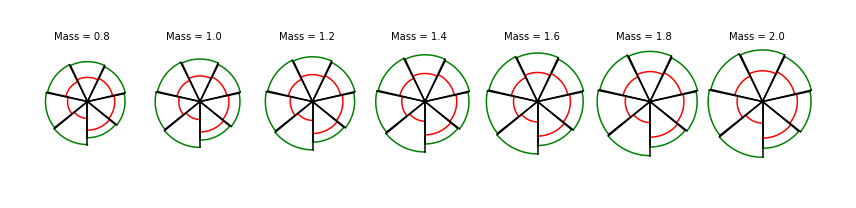

In [32]:
def x(r, theta):
    return r*np.sin(theta)
def y(r, theta):
    return r*np.cos(theta)

n_CFe = 7
n_M = 7
n_t = 50
Masses = [0.8, 1., 1.2, 1.4, 1.6, 1.8, 2.]
CFe = [15., 25., 35., 45., 55., 65., 75.]
theta = np.linspace(-np.pi, np.pi, n_CFe*n_t)
max_R = data["Rp"].max()

fig, ax = plt.subplots(figsize=[12, 3])

for j, mass in enumerate(Masses): 
    ax.text((j-0.3)*max_R*2, max_R*1.1, "Mass = {}". format(mass))
    for i, Fe in enumerate(CFe):
        th = theta[i*n_t:i*n_t+n_t]
        r = data[(data["M"]==mass) & (data["C_Fe"]==Fe) & (data["C_FeM"]==0.)] 
        Rp = r.iloc[0]["Rp"]
        Rc = r.iloc[0]["Rc"]

        
        ax.plot(Rp*np.sin(th)+2*j*max_R, Rp*np.cos(th), 'green')
        ax.plot(Rc*np.sin(th)+2*j*max_R, Rc*np.cos(th), 'red')
        ax.plot([0, Rp*np.sin(th[0])]+2*j*max_R, [0, Rp*np.cos(th[0])], "black")
        ax.plot([0, Rp*np.sin(th[-1])]+2*j*max_R, [0, Rp*np.cos(th[-1])], "black")
        
plt.axis('equal')
#ax.set_ylim([-max_R, max_R])
#ax.set_xlim([-max_R, 13*max_R])
plt.axis("off")
plt.tight_layout()

## Profiles inside the planets 

./input/data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res


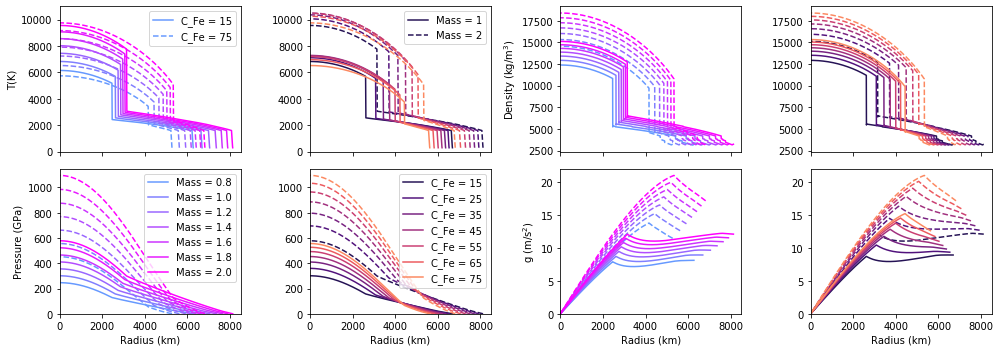

In [34]:
 if folder == "./With_DTcmb/" or folder == "./No_DTcmb/" or folder == "./input/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax3 = plt.subplots(2, 4, figsize=[14,5], sharex=True)


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.] 
Fe = [15, 25, 35, 45, 55, 65, 75]


def figure(data, i, symb="-", column=0, label="", label2=""): 
    _label = ""
    if column == 0:
        if i == 0:
            _label = label
    elif column == 1:
        if i == 0:
            _label = label
    ax3[0, column].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=_label)
    _label = label2
    ax3[1, column].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i], label=_label)
    ax3[0, column+2].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i], label=_label)
    ax3[1, column+2].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i], label="")

def file(M, Fe):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_ 0.0000.res".format(M, Fe)
   
print(file(0.8, 15))
    
mycm = plt.cm.cool(np.array(Masses)/2.)
for i, M in enumerate(Masses):
    filename = file(M, 15)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    #print(data)
    figure(data, i, label="C_Fe = 15", label2="Mass = {}".format(M))
    filename = file(M, 75)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', label="C_Fe = 75")

mycm = plt.cm.magma(np.array(Fe)/100.)
for i, C in enumerate(Fe):
    filename = file(1.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, column=1, label="Mass = 1", label2="C_Fe = {}".format(C))
    filename = file(2.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', column=1, label="Mass = 2")

ax3[0,0].set_ylabel("T(K)")
ax3[1,2].set_ylabel("g (m/s$^2$)")
ax3[0,2].set_ylabel("Density (kg/m$^3$)")
ax3[1,0].set_ylabel("Pressure (GPa)")
ax3[1,0].set_xlabel("Radius (km)")
ax3[1,1].set_xlabel("Radius (km)")
ax3[1,2].set_xlabel("Radius (km)")
ax3[1,3].set_xlabel("Radius (km)")
plt.tight_layout()
ax3[0,0].legend()
ax3[0,1].legend()
ax3[1,0].legend()
ax3[1,1].legend()
ax3[0,0].set_ylim([0, 11000])
ax3[0,1].set_ylim([0, 11000])
ax3[1,0].set_ylim([0,1150])
ax3[1,1].set_ylim([0,1150])
ax3[1,2].set_ylim([0,22])
ax3[1,3].set_ylim([0,22])
ax3[0,0].set_xlim([0, 8500])

plt.tight_layout()
plt.savefig(folder+"profiles_T_P_rho_g.pdf")

## Find pressure at the CMB and rIC size

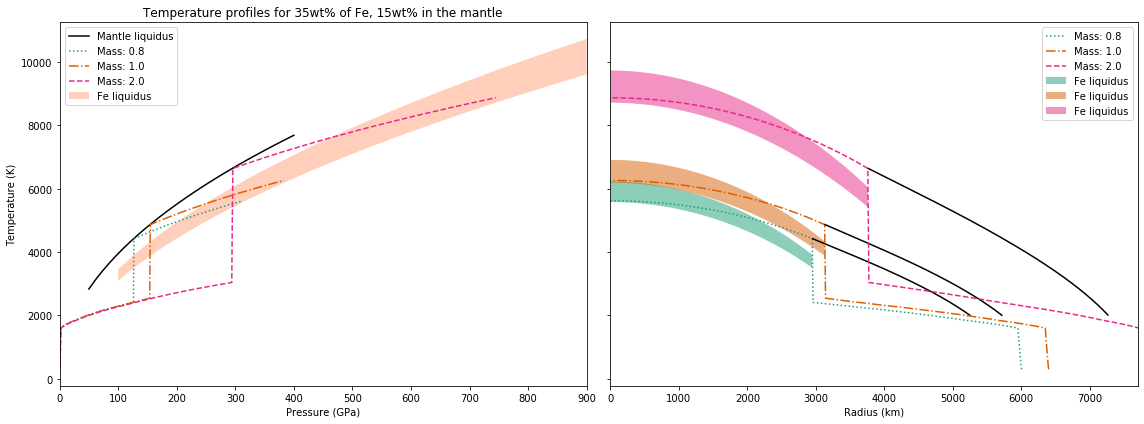

In [35]:
 if folder == "./With_DTcmb/" or folder == "./No_DTcmb/" or folder == "./input/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax = plt.subplots(1, 2, sharey=True, figsize=[16, 6])

def file(M, Fe, FeM=0):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_{:2d}.0000.res".format(M, Fe, FeM)

XFe = 35
FeM = 15
file_08 = file(0.8, XFe, 0)
file_1 = file(1.0, XFe, 0)
file_2 = file(2.0, XFe, 0)

mark = [":", "-.", "--"]

masses = np.array([0.8, 1.0, 2.0])
cm = plt.cm.Dark2((masses-0.4)/4)




P = np.linspace(50, 400, 30)
ax[0].plot(P, parameters.T_liquidus_mantle(P, FeM/100), "k", label="Mantle liquidus")

P = np.linspace(100, 900, 30)
#ax[0].plot(P, T_liquidus_core(P), "r", label="Core liquidus -- pure iron")
#ax[0].plot(P, T_liquidus_core(P, 0.05), "tomato", label="Core liquidus -- 5%LE")
#ax[0].plot(P, T_liquidus_core(P, 0.10), "lightsalmon", label="Core liquidus -- 10%LE")
ax[0].fill_between(P, parameters.T_liquidus_core(P), parameters.T_liquidus_core(P, 0.11), facecolor="lightsalmon", alpha=0.5, label= "Fe liquidus")

for i, mass in enumerate(masses):
    data = pd.read_csv(file(mass, XFe, FeM), skipinitialspace=True, sep=" ", names=names, index_col=False)
    ax[0].plot(data["p(GPa)"], data["T(K)"], mark[i], color=cm[i], label="Mass: {}".format(mass))
    ax[1].plot(data["r(m)"]/1e3, data["T(K)"], mark[i], color=cm[i], label="Mass: {}".format(mass))

    #print(data)
    deep_mantle = data[(data["Material-Parameter"] == 7.) | (data["Material-Parameter"] == 6.)]
    core = data[(data["Material-Parameter"] == 8.)]
    #print(deep_mantle)
    ax[1].plot(deep_mantle["r(m)"]/1e3, parameters.T_liquidus_mantle(deep_mantle["p(GPa)"], FeM/100.), color="k", label="")
    #ax[1].plot(core["r(m)"]/1e3, T_liquidus_core(core["p(GPa)"]), color=cm[i], label= "")
    ax[1].fill_between(core["r(m)"]/1e3, parameters.T_liquidus_core(core["p(GPa)"]), parameters.T_liquidus_core(core["p(GPa)"], 0.11), facecolor=cm[i], alpha=0.5, label= "Fe liquidus")

    
ax[0].set_xlabel("Pressure (GPa)")
ax[1].set_xlabel("Radius (km)")
ax[0].set_ylabel("Temperature (K)")
ax[0].legend(fontsize="medium")
ax[1].legend(fontsize="medium")
ax[0].set_xlim([0, 900])
ax[1].set_xlim([0, 7700])

ax[0].set_title("Temperature profiles for {}wt% of Fe, {}wt% in the mantle".format(XFe, FeM))

plt.tight_layout()
plt.savefig(folder+"/temperature_profiles.pdf")

In [36]:
def calculate_parameters(filename, Mp, XFe, FeM):
    if folder == "./With_DTcmb/" or folder == "./No_DTcmb/" or folder == "./input/":
        names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
    else: 
        names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
                "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
    core = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    core = core[core["Material-Parameter"]==8.]
    #core = read_data_profiles(filename, core=True)
    # extract the mass, XFe, FeM
    print(filename)
    #newstr = ''.join((ch if ch in '0123456789.' else ' ') for ch in filename[:-4])
    #Mp, XFe, FeM = [float(i) for i in newstr.split()]
    # initialize parameters with Earth
    param = {}#Earth()
    #update parameters
    param["Mp"], param["XFe"], param["FeM"] = Mp, XFe, FeM
    param["rho_0"], param["L_rho"], param["A_rho"] = parameters.find_Lrho_Arho(core)
    # param["CP"] = average_volume(core, "Cp(J/kgK)").tolist()
    # param["alpha_c"] = average_volume(core, "alpha(10^-5 1/s)").tolist() * 1e-5
    param["gamma"] = parameters.average_volume(core, "Gruneisen(1)").tolist()
    param["T0"] = core["T(K)"].iloc[-1].tolist()
    param["P0"] = core["p(GPa)"].iloc[-1].tolist()
    P0 = core["p(GPa)"].iloc[-1]
    T0 = core["T(K)"].iloc[-1]
    param["r_IC_0"] = parameters.find_r_IC_adiabat(param["rho_0"], param["L_rho"], param["A_rho"], P0, param["T0"], param["gamma"], S=0.)
    param["r_IC_5"] = parameters.find_r_IC_adiabat(param["rho_0"], param["L_rho"], param["A_rho"], P0, param["T0"], param["gamma"], S=0.05)
    param["r_OC"] = core["r(m)"].iloc[0].tolist()
    param["TL0"] = parameters.T_liquidus_core(P0, 0).tolist()
    param["K_c"] = 1403.e9 # Earth's bulk modulus at the center (Labrosse+2015)
    param["Tcenter-Tmelt_X0"] = parameters.T_liquidus_core(P0, 0.00) -T0
    param["Tcenter-Tmelt-X5"] = parameters.T_liquidus_core(P0, 0.00) -T0
    return param
    

./input/data_prof_M_ 0.8_Fe_15.0000_FeM_20.0000.res
./input/data_prof_M_ 0.8_Fe_25.0000_FeM_20.0000.res
./input/data_prof_M_ 0.8_Fe_35.0000_FeM_20.0000.res


/Users/irenebonati/Desktop/core/parameters.py:98: RuntimeWarning: invalid value encountered in double_scalars
  return 6500.*(P/340)**0.515/(1-np.log(1-S))


./input/data_prof_M_ 0.8_Fe_45.0000_FeM_20.0000.res
./input/data_prof_M_ 0.8_Fe_55.0000_FeM_20.0000.res
./input/data_prof_M_ 0.8_Fe_65.0000_FeM_20.0000.res
./input/data_prof_M_ 0.8_Fe_75.0000_FeM_20.0000.res
./input/data_prof_M_ 0.9_Fe_15.0000_FeM_20.0000.res
./input/data_prof_M_ 0.9_Fe_25.0000_FeM_20.0000.res
./input/data_prof_M_ 0.9_Fe_35.0000_FeM_20.0000.res
./input/data_prof_M_ 0.9_Fe_45.0000_FeM_20.0000.res
./input/data_prof_M_ 0.9_Fe_55.0000_FeM_20.0000.res
./input/data_prof_M_ 0.9_Fe_65.0000_FeM_20.0000.res
./input/data_prof_M_ 0.9_Fe_75.0000_FeM_20.0000.res
./input/data_prof_M_ 1.0_Fe_15.0000_FeM_20.0000.res
./input/data_prof_M_ 1.0_Fe_25.0000_FeM_20.0000.res
./input/data_prof_M_ 1.0_Fe_35.0000_FeM_20.0000.res
./input/data_prof_M_ 1.0_Fe_45.0000_FeM_20.0000.res
./input/data_prof_M_ 1.0_Fe_55.0000_FeM_20.0000.res
./input/data_prof_M_ 1.0_Fe_65.0000_FeM_20.0000.res
./input/data_prof_M_ 1.0_Fe_75.0000_FeM_20.0000.res
./input/data_prof_M_ 1.1_Fe_15.0000_FeM_20.0000.res
./input/data

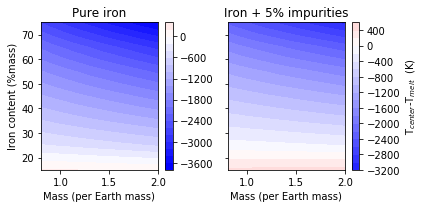

In [37]:
if folder == "./With_DTcmb/" or folder == "./No_DTcmb/" or folder == "./input/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.] 
Fe = [15, 25, 35, 45, 55, 65, 75]

M, F = np.meshgrid(Masses, Fe)
Values_DT_0 = np.zeros_like(M)
Values_DT_5 = np.zeros_like(M)
Values_IC_0 = np.zeros_like(M)
Values_IC_5 = np.zeros_like(M)


FeM = 10.
for i, mass in enumerate(Masses):
    for j, iron in enumerate(Fe):
        filename = file(mass, iron, 20)
        data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
        pressure = data["p(GPa)"].iloc[-1] 
        T_center = data["T(K)"].iloc[-1]
        DT = parameters.T_liquidus_core(pressure, 0.05) -T_center
        Values_DT_5[j, i] = -DT
        DT = parameters.T_liquidus_core(pressure, 0) -T_center
        Values_DT_0[j, i] = -DT
        param = calculate_parameters(filename, mass, iron, FeM)
        Values_IC_0[j, i] = param["r_IC_0"]
        Values_IC_0[j, i] = param["r_IC_5"]

        
        
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=[6, 3])
maximum_0 = np.amax(np.abs(Values_DT_0))
maximum_5 = np.amax(np.abs(Values_DT_5))
maximum = max(maximum_0, maximum_5)
sc = ax[0].contourf(M, F, Values_DT_0, 20, cmap = plt.cm.bwr, vmin=-maximum, vmax =maximum)
sc2 = ax[1].contourf(M, F, Values_DT_5, 20, cmap = plt.cm.bwr, vmin=-maximum, vmax =maximum)
#ax.contour(M, F, np.sign(Values_DT), 10)

ax[0].set_xlabel("Mass (per Earth mass)")
ax[1].set_xlabel("Mass (per Earth mass)")
ax[0].set_ylabel("Iron content (%mass)")
cb = plt.colorbar(sc, ax = ax[0])
cb = plt.colorbar(sc2, ax=ax[1])
cb.set_label("T$_{center}$-T$_{melt}$  (K)")
ax[0].set_title("Pure iron")
ax[1].set_title("Iron + 5% impurities")
plt.tight_layout()

[1.8 1.2 1.4 1.  1.6 0.8 1.5 2.  1.1 0.9 1.3]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: No contour levels were found within the data range.
  


Text(0.5, 1.0, 'r_ic_005')

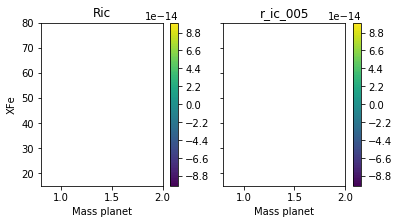

In [40]:
# parameters.explore_all_create_yaml("With_DTcmb/",fig=True)

all_files = "input/all_files_list.txt"
names = ["Mp", "XFe", "FeM", "rho", "L", "A", "r_ic", "r_ic_005", "r_ic_011", "r_OC", "r_planet", "Pcmb", "Tcmb", "P0", "T0"]

data = pd.read_csv(all_files, skipinitialspace=True, sep=" ", names=names)
data = data[data["FeM"]==10.]
print(data["Mp"].unique())
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=[6,3])
sc = ax[0].tricontourf(data["Mp"], data["XFe"], data["r_ic"]/1e3, 100)
sc2 = ax[0].tricontour(data["Mp"], data["XFe"], data["r_ic"]/1e3, levels=[1], colors="black")
plt.colorbar(sc, ax=ax[0])
sc = ax[1].tricontourf(data["Mp"], data["XFe"], data["r_ic_005"]/1e3,100)
sc2 = ax[1].tricontour(data["Mp"], data["XFe"], data["r_ic_005"]/1e3,levels=[1], colors="black")

plt.colorbar(sc, ax=ax[1])
ax[0].set_ylabel("XFe")
ax[0].set_xlabel("Mass planet")
ax[0].set_title("Ric")
ax[1].set_xlabel("Mass planet")
ax[1].set_title("r_ic_005")

In [42]:
## import the data
all_files = "input/all_files_list.txt"
names = ["Mp", "XFe", "FeM", "rho", "L", "A", "r_ic", "r_ic_005", "r_ic_011", "r_oc", "r_p", "pcmb", "Tcmb", "pcenter", "Tcenter"]
data = pd.read_csv(all_files, skipinitialspace=True, sep=" ", names=names)

data["ratio_oc"] = data["r_p"]/data["r_oc"]
data["ratio_ic"] = data["r_oc"]/data["r_ic"]




13


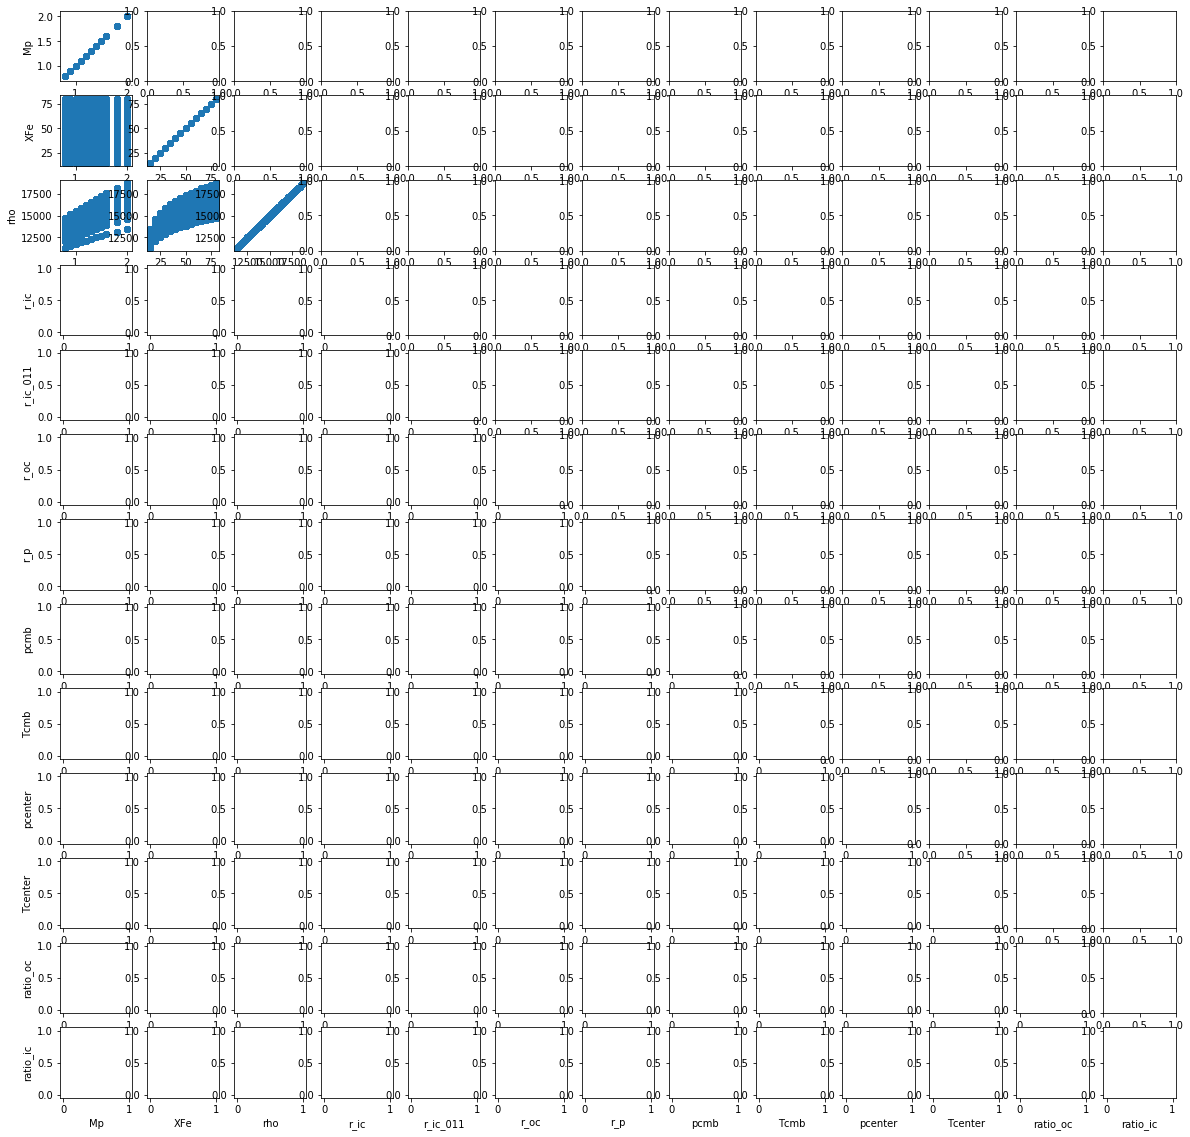

In [43]:
## figure with IC_size

names_fig = ["Mp", "XFe", "rho", "r_ic", "r_ic_011", "r_oc", "r_p", "pcmb", "Tcmb", "pcenter", "Tcenter", "ratio_oc", "ratio_ic"]
data_test = data[data["FeM"]==20.]

n_fig = len(names_fig)
print(n_fig)

fig, ax = plt.subplots(n_fig, n_fig, figsize=[20,20])

for i_fig, name_1 in enumerate(names_fig):
    for j_fig, name_2 in enumerate(names_fig):
        if j_fig<=i_fig:
            ax[i_fig, j_fig].scatter(data_test[name_2], data_test[name_1])
    ax[i_fig, 0].set_ylabel(name_1)
    ax[-1, i_fig].set_xlabel(name_1)

#fig, ax = plt.subplots()
#ax.plot(data_test["r_ic"], '.')


In [ ]:
FeM_list = data["FeM"].unique() # [0., 5., 10., 15.,  20.]
FeM_list.sort()
n_fig = len(FeM_list)

fig_1, ax_1 = plt.subplots(1, n_fig, figsize=[16,4])
ax_1[0].set_ylabel("Radius (km)")
fig_2, ax_2 = plt.subplots(4, n_fig, figsize=[16,8])
ax_2[0, 0].set_ylabel("Mass of planet")
ax_2[1, 0].set_ylabel("Mass of planet")
ax_2[2, 0].set_ylabel("Mass of planet")
ax_2[3, 0].set_ylabel("Mass of planet")
fig_3, ax_3 = plt.subplots(3, n_fig, figsize=[16,6])
ax_3[0, 0].set_ylabel("Mass of planet")
ax_3[1, 0].set_ylabel("Mass of planet")
ax_3[2, 0].set_ylabel("Mass of planet")

for i, FeM in enumerate(FeM_list):
    _data = data[data["FeM"]==FeM]

    sc1 = ax_1[i].scatter(_data["XFe"], _data["r_oc"]/1e3, c=_data["Mp"], marker="+", cmap="magma")
    sc1 = ax_1[i].scatter(_data["XFe"], _data["r_ic"]/1e3, c=_data["Mp"], marker="x", cmap="magma")
    sc1 = ax_1[i].scatter(_data["XFe"], _data["r_p"]/1e3, c=_data["Mp"], marker=".", cmap="magma")
    ax_1[i].set_xlabel("X_Fe")
    ax_1[i].set_title("FeM: {}".format(FeM))
    
    sc3_0 = ax_3[0, i].tricontourf(_data["XFe"], _data["Mp"], _data["r_p"]/1e3)
    sc3_1 = ax_3[1, i].tricontourf(_data["XFe"], _data["Mp"], _data["r_oc"]/1e3)
    sc3_2 = ax_3[1, i].tricontourf(_data["XFe"], _data["Mp"], _data["r_oc"]/_data["r_p"])

    sc2_0 = ax_2[0, i].tricontourf(_data["XFe"], _data["Mp"], _data["r_ic"]/1e3)
    sc2_1 = ax_2[1, i].tricontourf(_data["XFe"], _data["Mp"], _data["r_ic"]/_data["r_oc"])
    sc2_2 = ax_2[2, i].tricontourf(_data["XFe"], _data["Mp"], _data["r_ic_011"]/1e3)
    sc2_3 = ax_2[3, i].tricontourf(_data["XFe"], _data["Mp"], _data["r_ic_011"]/_data["r_oc"])
    ax_2[-1, i].set_xlabel("X_Fe")
    ax_2[0, i].set_title("FeM: {}".format(FeM))
    ax_2[-1, i].set_xlabel("X_Fe")
    ax_2[0, i].set_title("FeM: {}".format(FeM))
    ax_3[0, i].set_xlabel("X_Fe")
    ax_3[1, i].set_title("FeM: {}".format(FeM))

cbar = fig.colorbar(sc1, ax=ax_1.ravel().tolist(), shrink=0.95)
cbar.set_label("Mass Planet")

cbar = fig.colorbar(sc2_0, ax=ax_2[0,:].ravel().tolist(), shrink=0.95)
cbar.set_label("Ric (km)")
cbar = fig.colorbar(sc2_1, ax=ax_2[1,:].ravel().tolist(), shrink=0.95)
cbar.set_label("Ric/Roc")
cbar = fig.colorbar(sc2_2, ax=ax_2[2,:].ravel().tolist(), shrink=0.95)
cbar.set_label("Ric (km)")
cbar = fig.colorbar(sc2_3, ax=ax_2[3,:].ravel().tolist(), shrink=0.95)
cbar.set_label("Ric/Roc")

In [ ]:
FeM_list = data["FeM"].unique() # [0., 5., 10., 15.,  20.]
FeM_list.sort()
colors = pl.cm.magma(FeM_list/20)

Mp_list = data["Mp"].unique()
Mp_list.sort()

fig_3, ax_3 = plt.subplots()
sc1 = ax_3.scatter(data["XFe"], data["r_oc"]/data["r_p"], c=data["FeM"], s=0,  marker=".", cmap="magma")
#sc1 = ax_3.scatter(data["XFe"], data["r_ic"]/data["r_p"], c=data["FeM"], marker="x", cmap="magma")
for ife, FeM in enumerate(FeM_list):
    for Mp in Mp_list: 
        data_single_planet = data[(data["FeM"]==FeM) & (data["Mp"]==Mp)].sort_values("XFe")
        ax_3.plot(data_single_planet["XFe"], data_single_planet["r_oc"]/data_single_planet["r_p"], "--", color=colors[ife])
        ax_3.plot(data_single_planet["XFe"], data_single_planet["r_ic"]/data_single_planet["r_p"], ":", color=colors[ife])

#ax_3.scatter(data["XFe"], data["r_p"]/data["r_p"], marker="8", color="black")
ax_3.plot([15, 80],[1., 1.], "k")
cbar = fig.colorbar(sc1, ax=ax_3, label="FeM")
ax_3.set_xlabel("XFe")
ax_3.set_ylabel("Radius/R_Planet")


In [ ]:
fig, ax = plt.subplots(2, 3, figsize=[10,4])
ax[0, 0].set_ylabel("XFe")
ax[1, 0].set_ylabel("XFe")

for i, Mp in enumerate([1.,1.5, 2.]):
    _data = data[data["Mp"]==Mp]
    sc0 = ax[0, i].tricontourf(_data["XFe"], _data["FeM"], _data["r_ic_011"]/1e3, 20)
    sc1 = ax[1, i].tricontourf(_data["XFe"], _data["FeM"], _data["r_ic_011"]/_data["r_oc"], 20, vmin=0, vmax=1)
    ax[1, i].set_xlabel("FeM")
    ax[0, i].set_title("Mp = {} M_Earth".format(Mp))

cbar = fig.colorbar(sc0, ax=ax[0,:].ravel().tolist())
cbar.set_label("Ric (km)")
cbar = fig.colorbar(sc1, ax=ax[1,:].ravel().tolist())
cbar.set_clim(0., 1.0)
cbar.set_label("Ric/Roc")

plt.savefig("Fe_011.pdf")


fig, ax = plt.subplots(2, 3, figsize=[10,4])
ax[0, 0].set_ylabel("XFe")
ax[1, 0].set_ylabel("XFe")
ax[0,0].set_title("iron 0.11")

for i, Mp in enumerate([1.,1.5, 2.]):
    _data = data[data["Mp"]==Mp]
    sc0 = ax[0, i].tricontourf(_data["XFe"], _data["FeM"], _data["r_ic"]/1e3, 20)
    sc1 = ax[1, i].tricontourf(_data["XFe"], _data["FeM"], _data["r_ic"]/_data["r_oc"], 20, vmin=0, vmax=1)
    ax[1, i].set_xlabel("FeM")
    ax[0, i].set_title("Mp = {} M_Earth".format(Mp))

cbar = fig.colorbar(sc0, ax=ax[0,:].ravel().tolist())
cbar.set_label("Ric (km)")
cbar = fig.colorbar(sc1, ax=ax[1,:].ravel().tolist(), )
cbar.set_label("Ric/Roc")

plt.savefig("Pure_Fe.pdf")

In [ ]:


FeM_list = data["FeM"].unique() # [0., 5., 10., 15.,  20.]
FeM_list.sort()
n_fig = len(FeM_list)

XFe_list = data["XFe"].unique()
XFe_list.sort()

Mp_list = data["Mp"].unique()
Mp_list.sort()
colors = pl.cm.magma((Mp_list-0.8)/1.2)

fig_1, ax_1 = plt.subplots(1, n_fig, figsize=[16,4])
ax_1[0].set_ylabel("Radius (km)")

for i, FeM in enumerate(FeM_list):
    for ip, Mp in enumerate(Mp_list):
        #print(FeM, Mp, XFe)
        data_single_planet = data[(data["FeM"]==FeM) & (data["Mp"]==Mp)].sort_values("XFe")
        ax_1[i].plot(data_single_planet["XFe"], data_single_planet["r_p"]/1e3, color=colors[ip])
        ax_1[i].plot(data_single_planet["XFe"], data_single_planet["r_oc"]/1e3, '--', color=colors[ip])
        ax_1[i].plot(data_single_planet["XFe"], data_single_planet["r_ic"]/1e3, ':', color=colors[ip])
        ax_1[i].plot(data_single_planet["XFe"], data_single_planet["r_ic_011"]/1e3, ':', color=colors[ip])
    _data = data[data["FeM"]==FeM]
    ax_1[i].set_xlabel("X_Fe")
    ax_1[i].set_title("FeM: {}".format(FeM))


cbar = fig.colorbar(sc1, ax=ax_1.ravel().tolist())
cbar.set_label("Mass Planet")
